# Intermediate Python: Programming
# Class 2: Conditional statements and functions

In our last class, 
we used `numpy` to work with arrays,
created plots with matplotlib,
and used for loops to repeat actions.

We'll continue working with those same data files and add to our reproducible workflow to automate data analysis.
By the end of this class,
you should be able to:
- make choices using conditional statements (if, elif, else)
- evaluate expressions containing and and or
- combine for loops and conditional statements
- create functions

## Making choices

tell python to take different actions with if statements

In [1]:
num = 37
if num > 100:
    print("greater")
else:
    print("not greater")
print("done")

not greater
done


don't need else; can also do nothing

In [2]:
num = 53
print("before conditional...")
if num > 100:
    print(num," is greater than 100")
print("...after conditional")


before conditional...
...after conditional


In [3]:
# can have multiple alternatives using elif
num = -3

if num > 0:
    print(num, "is positive")
elif num == 0: # double equal sign is necessary; single used to assign values
    print(num, "is zero")
else:
    print(num, "is negative")


-3 is negative


In [4]:
# combine tests using and, when both parts must be true
if (1 > 0) and (-1 > 0):
    print("both parts are true")
else:
    print("at least one part is false")


at least one part is false


In [5]:
# combine tests using or if at least one part must be true
if (1 < 0) or (-1 < 0):
    print("at least one test is true")
# true and false are booleans


at least one test is true


**Challenge:** Given the following code, what answer do you expect to be correct? How would you rewrite the code to get another answer?

```
if 4 > 5:
    print("A")
elif 4 == 5:
    print("B")
elif 4 < 5:
    print("C")
```

In [6]:
# checking for problems in inflammation data
import glob
import numpy
import matplotlib.pyplot

data = numpy.loadtxt(fname="data/inflammation-01.csv", delimiter=",")


In [7]:
# find max for two days in the study
max_inflammation_0 = numpy.max(data, axis=0)[0]
max_inflammation_20 = numpy.max(data, axis=0)[20]


In [8]:
# check if max equals day number (indicating error in data entry)
if max_inflammation_0 == 0 and max_inflammation_20 == 20:
    print("Suspicious looking maxima!")


Suspicious looking maxima!


In [9]:
# check if any patients are have zero total inflammation (healthy patient)
if numpy.sum(numpy.min(data, axis=0)) == 0:
    print("Minima add up to zero!")

In [10]:
# combine together and test on another data file
data = numpy.loadtxt(fname="data/inflammation-03.csv", delimiter=",")

max_inflammation_0 = numpy.max(data, axis=0)[0]
max_inflammation_20 = numpy.max(data, axis=0)[20]

if max_inflammation_0 == 0 and max_inflammation_20 == 20:
    print("Suspicious looking maxima!")
elif numpy.sum(numpy.min(data, axis=0)) == 0:
    print("Minima add up to zero!")
else:
    print("Seems OK!")


Minima add up to zero!


Challenge:
Write a loop that counts the number of vowels in a character string.
Test it on a few individual words and full sentences.
Once you are done, compare your solution to your neighbor’s. Did you make the same decisions about how to handle the letter ‘y’ (which some people think is a vowel, and some do not)?

## Creating functions

In [13]:
# define a function that converts F to C
def fahr_to_celsius(temp):
    return ((temp - 32) * (5/9))
# why can"t you print the result instead of return?
# return function causes function to stop

# test function
fahr_to_celsius(32)


0.0

In [14]:

# test function with meaningful print statements
print("freezing point of water:", fahr_to_celsius(32), "C")
print("boiling point of water:", fahr_to_celsius(212), "C")


freezing point of water: 0.0 C
boiling point of water: 100.0 C


In [15]:
# convert C to K by composing functions: to apply one function to the result of another
def celsius_to_kelvin(temp_c):
    return temp_c + 273.15

print("freezing point of water in Kelvin:", celsius_to_kelvin(0.))


freezing point of water in Kelvin: 273.15


In [16]:
# converting F to K
def fahr_to_kelvin(temp_f):
    temp_c = fahr_to_celsius(temp_f)
    temp_k = celsius_to_kelvin(temp_c)
    return temp_k

print("boiling point of water in Kelvin:", fahr_to_kelvin(212.0))


boiling point of water in Kelvin: 373.15


Challenge: You can "add" strings together using +, such as:
"a" + "b"
## Write a function called fence that takes two parameters called original and wrapper and returns a new string that has the wrapper character at the beginning and end of the original. A call to your function should look like this:
# input: print(fence('name', '*'))
# output: *name*

## Challenge: What does the following piece of code display when run — and why?


In [17]:
# create function to analyze files with data viz
def analyze(filename):

    data = numpy.loadtxt(fname=filename, delimiter=",")

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel("average")
    axes1.plot(numpy.mean(data, axis=0))

    axes2.set_ylabel("max")
    axes2.plot(numpy.max(data, axis=0))

    axes3.set_ylabel("min")
    axes3.plot(numpy.min(data, axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()
# why don't we need to include a return statement?


In [18]:
# create function to detect data errors
def detect_problems(filename):

    data = numpy.loadtxt(fname=filename, delimiter=",")

    if numpy.max(data, axis=0)[0] == 0 and numpy.max(data, axis=0)[20] == 20:
        print("Suspicious looking maxima!")
    elif numpy.sum(numpy.min(data, axis=0)) == 0:
        print("Minima add up to zero!")
    else:
        print("Seems OK!")


data/inflammation-01.csv


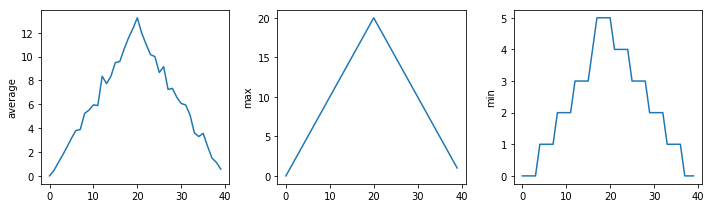

Suspicious looking maxima!
data/inflammation-02.csv


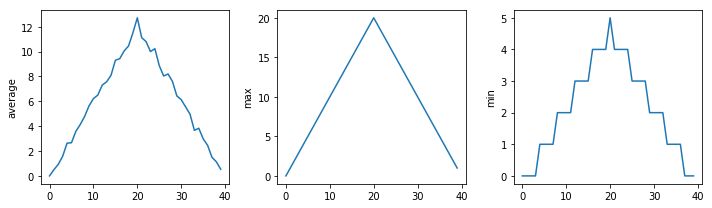

Suspicious looking maxima!
data/inflammation-03.csv


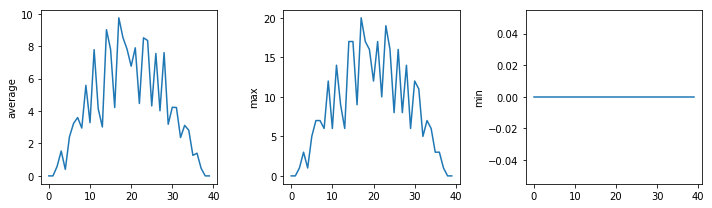

Minima add up to zero!


In [19]:
# use both functions across all files in for loop
filenames = sorted(glob.glob("data/inflammation*.csv"))

for f in filenames[:3]:
    print(f)
    analyze(f)
    detect_problems(f)
